# validation of the replication results

In [42]:
# load pytorch library

import torch

# load the model from the saved file in .bin format

model = torch.load('code/saved_models/regcn_l2_hs128_uni_ws5_lr5e4/checkpoint-best-acc/ReGVD_GCN_UniT_G-CB.bin')

In [43]:
# load txt file into pandas data frame

import pandas as pd

df_pred = pd.read_csv('code/saved_models/regcn_l2_hs128_uni_ws5_lr5e4/predictions_ReGVD_GCN_UniT_G-CB.txt', sep='\t', header=None)
df_pred_win = pd.read_csv('code/saved_models/regcn_l2_hs128_uni_ws5_lr5e4_WIN/predictions_ReGVD_GCN_UniT_G-CB_WIN.txt', sep='\t', header=None)
df_pred_replication = pd.read_csv('code/saved_models/regcn_l2_hs128_uni_ws5_lr5e4_replication/predictions.txt', sep='\t', header=None)
df_pred_GGNN = pd.read_csv('code/saved_models/reggnn_l2_hs128_uni_ws5_lr5e4/predictions_ReGVD_GGNN_UniT_CB.txt', sep='\t', header=None)
df_pred_GCN_idx = pd.read_csv('code/saved_models/regcn_l2_hs128_idx_ws5_lr5e4/predictions_ReGVD_GCN_idx_G-CB.txt', sep='\t', header=None)


In [44]:
# rename column 0 of df_pred to 'idx' and column 1 to 'pred'

df_pred.columns = ['idx', 'pred']
df_pred_win.columns = ['idx', 'pred']
df_pred_replication.columns = ['idx', 'pred']
df_pred_GGNN.columns = ['idx', 'pred']
df_pred_GCN_idx.columns = ['idx', 'pred']

df_pred.head()

,idx,pred
0,3,1
1,12,0
2,35,0
3,43,1
4,60,1


In [45]:
# load test.jsonl as pandas data frame

import json

with open('dataset/test.jsonl') as f:
    js_all = [json.loads(line) for line in f]

# store test.jsonl as pandas data frame

df_test = pd.DataFrame(js_all)



In [46]:
# delete columns from df_test with name 'project', 'commit_id' and 'func'

del df_test['project']
del df_test['commit_id']
del df_test['func']

In [47]:
# change order of columns in df_test an move 'idx' to the first position

cols = df_test.columns.tolist()
cols = cols[-1:] + cols[:-1]
df_test = df_test[cols]


In [48]:
# calculate the accucuracy of df_pred and df_test

y_pred = df_pred['pred'].astype(int)
y_pred_win = df_pred_win['pred'].astype(int)
y_pred_replication = df_pred_replication['pred'].astype(int)
y_pred_GGNN = df_pred_GGNN['pred'].astype(int)
y_pred_GCN_idx = df_pred_GCN_idx['pred'].astype(int)
y_true = df_test['target'].astype(int)

# import accuracy from sklearn

from sklearn.metrics import accuracy_score

accuracy_ReGVD_GCN_UniT_G_CB = accuracy_score(y_true, y_pred)
accuracy_ReGVD_GCN_UniT_G_CB_WIN = accuracy_score(y_true, y_pred_win)
accuracy_replication = accuracy_score(y_true, y_pred_replication)
accuracy_ReGVD_GGNN_UniT_CB = accuracy_score(y_true, y_pred_GGNN)
accuracy_ReGVD_GCN_idx_G_CB = accuracy_score(y_true, y_pred_GCN_idx)

print("accuracy_ReGVD_GCN_UniT_G_CB: ", accuracy_ReGVD_GCN_UniT_G_CB)
print("accuracy_replication: ", accuracy_replication)
print("accuracy_ReGVD_GCN_UniT_G_CB_WIN: ", accuracy_ReGVD_GCN_UniT_G_CB_WIN)
print("accuracy_ReGVD_GGNN_UniT_CB: ", accuracy_ReGVD_GGNN_UniT_CB)
print("accuracy_ReGVD_GCN_idx_G_CB: ", accuracy_ReGVD_GCN_idx_G_CB)


accuracy_ReGVD_GCN_UniT_G_CB:  0.6248169838945827
accuracy_replication:  0.6248169838945827
accuracy_ReGVD_GCN_UniT_G_CB_WIN:  0.633601756954612
accuracy_ReGVD_GGNN_UniT_CB:  0.6204245973645681
accuracy_ReGVD_GCN_idx_G_CB:  0.6171303074670571


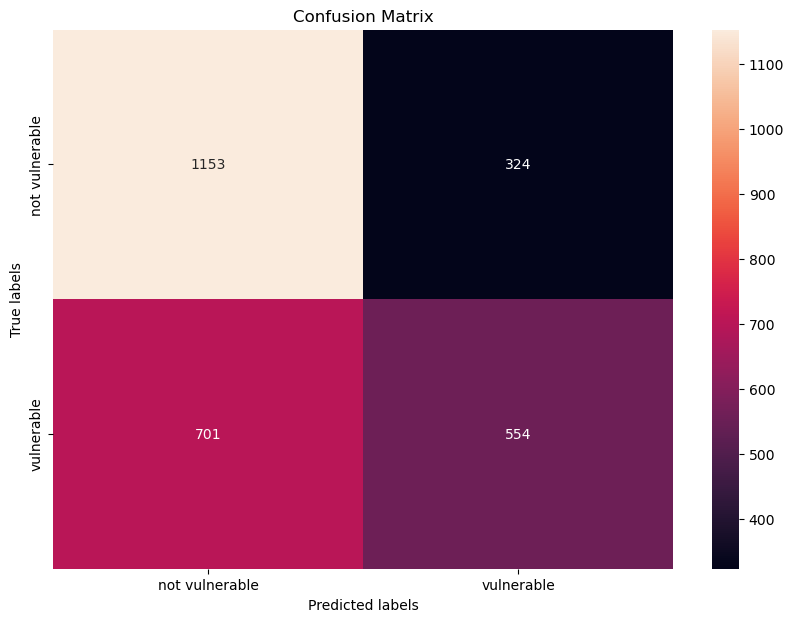

In [66]:
# make confusion matrix from y_true and y_pred

from sklearn.metrics import confusion_matrix

confusion_matrix(y_true, y_pred)

import seaborn as sn

import matplotlib.pyplot as plt

df_cm = pd.DataFrame(confusion_matrix(y_true, y_pred), index = [i for i in "01"], columns = [i for i in "01"])

plt.figure(figsize = (10,7))

ax= plt.subplot()
sn.heatmap(df_cm, annot=True, fmt='g', ax=ax)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['not vulnerable', 'vulnerable'])
ax.yaxis.set_ticklabels(['not vulnerable', 'vulnerable']);


plt.show()




In [68]:
# calculate the recall and specificity of y_true and y_pred

from sklearn.metrics import recall_score

recall = recall_score(y_true, y_pred)
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
specificity = tn / (tn+fp)

print("recall: ", recall)

print("specificity: ", specificity)

recall:  0.44143426294820715
specificity:  0.7806364251861883
